# Generate Analytics Report

## 1. Load in data

The data being used in the NBA 2021-2022 season player stats. This dataset was attained from Kaggle.

### 1.1 Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r".\2021-2022 NBA Player Stats - Regular.csv")
data

,Rk;Player;Pos;Age;Tm;G;GS;MP;FG;FGA;FG%;3P;3PA;3P%;2P;2PA;2P%;eFG%;FT;FTA;FT%;ORB;DRB;TRB;AST;STL;BLK;TOV;PF;PTS
0,1;Precious Achiuwa;C;22;TOR;73;28;23.6;3.6;8.3...
1,2;Steven Adams;C;28;MEM;76;75;26.3;2.8;5.1;0.5...
2,3;Bam Adebayo;C;24;MIA;56;56;32.6;7.3;13;0.557...
3,4;Santi Aldama;PF;21;MEM;32;0;11.3;1.7;4.1;0.4...
4,5;LaMarcus Aldridge;C;36;BRK;47;12;22.3;5.4;9....
...,...
807,601;Thaddeus Young;PF;33;TOR;26;0;18.3;2.6;5.5...
808,602;Trae Young;PG;23;ATL;76;76;34.9;9.4;20.3;0...
809,603;Omer Yurtseven;C;23;MIA;56;12;12.6;2.3;4.4...
810,604;Cody Zeller;C;29;POR;27;0;13.1;1.9;3.3;0.5...


### 1.2 Clean data

In [3]:
split_by_delim = 'Rk;Player;Pos;Age;Tm;G;GS;MP;FG;FGA;FG%;3P;3PA;3P%;2P;2PA;2P%;eFG%;FT;FTA;FT%;ORB;DRB;TRB;AST;STL;BLK;TOV;PF;PTS'
column_list = split_by_delim.split(';')
print(column_list)

['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']


In [4]:
data[column_list] = data[split_by_delim].str.split(';', expand=True)
data.drop(split_by_delim, axis=1, inplace=True)
data

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,0.595,2,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,...,0.543,4.6,5.4,10,3.4,0.9,0.8,1.5,2,6.9
2,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13,...,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,...,0.625,1,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,...,0.873,1.6,3.9,5.5,0.9,0.3,1,0.9,1.7,12.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,601,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,...,0.481,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3
808,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,0.904,0.7,3.1,3.7,9.7,0.9,0.1,4,1.7,28.4
809,603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,...,0.623,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3
810,604,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,...,0.776,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2


In [5]:
data[data['Player'] == 'James Harden']

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
282,218,James Harden,PG-SG,32,TOT,65,65,37.2,6.3,15.3,...,0.877,0.8,6.8,7.7,10.3,1.3,0.6,4.4,2.4,22
283,218,James Harden,PG,32,BRK,44,44,37,6.6,16,...,0.869,1,7,8,10.2,1.3,0.7,4.8,2.4,22.5
284,218,James Harden,SG,32,PHI,21,21,37.7,5.5,13.6,...,0.892,0.6,6.5,7.1,10.5,1.2,0.2,3.4,2.3,21


In [6]:
# only keep players TOT stats for statistical analysis

In [7]:
multiple_teams = data[data['Tm'] == 'TOT']
multiple_teams

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
5,6,Nickeil Alexander-Walker,SG,23,TOT,65,21,22.6,3.9,10.5,...,0.743,0.6,2.3,2.9,2.4,0.7,0.4,1.4,1.6,10.6
11,10,Justin Anderson,SF,28,TOT,16,6,19.8,2.3,5.9,...,0.789,0.3,2.6,2.9,2.1,0.5,0.4,0.5,1.4,6.4
22,19,D.J. Augustin,PG,34,TOT,55,2,16.1,1.7,4,...,0.884,0.2,1,1.2,1.9,0.3,0,1,0.7,5.3
29,24,Marvin Bagley III,PF,22,TOT,48,25,23.9,4.7,9.3,...,0.663,2.2,4.9,7,0.8,0.5,0.4,0.8,1.9,11.3
51,44,DeAndre' Bembry,SF,27,TOT,56,20,18.3,2.2,3.9,...,0.6,0.8,2.2,2.9,1.2,0.9,0.4,0.6,2,5.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,572,Tremont Waters,PG,24,TOT,3,0,16.7,1.3,4.7,...,0,0,1.3,1.3,2.3,1.7,0,1.3,1.3,3.3
776,578,Derrick White,SG,27,TOT,75,52,29.3,4.5,10.7,...,0.864,0.5,3,3.5,4.9,0.9,0.8,1.6,2.3,13.2
793,593,Justise Winslow,SF,25,TOT,48,11,16.1,2.3,5.4,...,0.591,1,3.2,4.2,1.8,0.7,0.5,1,1.4,5.7
801,599,Moses Wright,PF,23,TOT,4,0,3.5,0.3,1,...,1,0.3,0.5,0.8,0.5,0,0.3,0,0,1.3


In [8]:
player_dup = multiple_teams['Player'].values
player_dup

array(['Nickeil Alexander-Walker', 'Justin Anderson', 'D.J. Augustin',
       'Marvin Bagley III', "DeAndre' Bembry", 'D?vis Bert?ns',
       'Armoni Brooks', 'Charlie Brown Jr.', 'Chaundee Brown Jr.',
       'Moses Brown', 'Vernon Carey Jr.', 'Jevon Carter',
       'Willie Cauley-Stein', 'DeMarcus Cousins', 'Robert Covington',
       'Torrey Craig', 'Seth Curry', 'Spencer Dinwiddie',
       'Donte DiVincenzo', 'Jeff Dowtin', 'Goran Dragi?',
       'Andre Drummond', 'James Ennis III', 'Drew Eubanks',
       'Bruno Fernando', 'Malik Fitts', 'Bryn Forbes', 'Tim Frazier',
       'Wenyen Gabriel', 'Langston Galloway', 'Tyrese Haliburton',
       'James Harden', 'Montrezl Harrell', 'Josh Hart',
       'Juancho Hernang�mez', 'Buddy Hield', 'Malcolm Hill',
       'Aaron Holiday', 'Justin Holiday', 'Rodney Hood',
       'Danuel House Jr.', 'Elijah Hughes', 'Serge Ibaka', 'Josh Jackson',
       'Justin Jackson', 'Alize Johnson', 'Keon Johnson', 'Tyler Johnson',
       'Carlik Jones', 'DeAndre J

In [9]:
data[data['Player'].isin(player_dup) & (data['Tm'] != 'TOT')]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
6,6,Nickeil Alexander-Walker,SG,23,NOP,50,19,26.3,4.7,12.6,...,0.722,0.7,2.6,3.3,2.8,0.8,0.4,1.7,1.8,12.8
7,6,Nickeil Alexander-Walker,SG,23,UTA,15,2,9.9,1.1,3.2,...,0.917,0.1,1.5,1.5,1.1,0.3,0.3,0.5,1,3.5
12,10,Justin Anderson,SF,28,CLE,3,0,15.7,1.3,2.7,...,0.75,0,2,2,2,0.3,0,0.7,1.3,4.3
13,10,Justin Anderson,SF,28,IND,13,6,20.7,2.5,6.7,...,0.8,0.3,2.8,3.1,2.1,0.5,0.5,0.5,1.4,6.8
23,19,D.J. Augustin,PG,34,HOU,34,2,15,1.6,4,...,0.868,0.2,1,1.2,2.2,0.3,0,1.3,0.5,5.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,593,Justise Winslow,SF,25,POR,11,10,26.8,4.3,10.5,...,0.56,1.8,4.5,6.3,2.9,1.3,0.6,1.1,1.9,10.7
802,599,Moses Wright,PF,23,LAC,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
803,599,Moses Wright,PF,23,DAL,3,0,4.3,0.3,1.3,...,1,0.3,0.7,1,0.3,0,0.3,0,0,1.7
806,601,Thaddeus Young,PF,33,SAS,26,1,14.2,2.8,4.9,...,0.455,1.5,2,3.6,2.3,0.9,0.3,1.2,1.5,6.1


In [10]:
df = data[:]

In [11]:
df.drop(df[df['Player'].isin(player_dup) & (df['Tm'] != 'TOT')].index, inplace=True)
df.shape

C:\Users\Abdulkadir\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(605, 30)

In [12]:
data.shape

(812, 30)

## 2. Explore data

In [13]:
df.shape

(605, 30)

In [14]:
df.isnull().sum()

Rk        0
Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64

In [15]:
df.dtypes

Rk        object
Player    object
Pos       object
Age       object
Tm        object
G         object
GS        object
MP        object
FG        object
FGA       object
FG%       object
3P        object
3PA       object
3P%       object
2P        object
2PA       object
2P%       object
eFG%      object
FT        object
FTA       object
FT%       object
ORB       object
DRB       object
TRB       object
AST       object
STL       object
BLK       object
TOV       object
PF        object
PTS       object
dtype: object

#### 2.1 Clean data by giving appropriate data type

In [16]:
pd.set_option('display.max_columns', 30)
df.head(5)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,0.439,0.8,2.1,0.359,2.9,6.1,0.468,0.486,1.1,1.8,0.595,2,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,0.547,0,0,0,2.8,5,0.548,0.547,1.4,2.6,0.543,4.6,5.4,10,3.4,0.9,0.8,1.5,2,6.9
2,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13,0.557,0,0.1,0,7.3,12.9,0.562,0.557,4.6,6.1,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,0.402,0.2,1.5,0.125,1.5,2.6,0.56,0.424,0.6,1,0.625,1,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,0.55,0.3,1,0.304,5.1,8.8,0.578,0.566,1.9,2.2,0.873,1.6,3.9,5.5,0.9,0.3,1,0.9,1.7,12.9


In [17]:
floats = column_list[7:]
print(floats)

['MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']


In [18]:
# change these columns into floats
df[floats] = df[floats].astype(float)

C:\Users\Abdulkadir\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [19]:
# change rk, age, G, GS to int
df[['Rk', 'Age', 'G', 'GS']] = df[['Rk', 'Age', 'G', 'GS']].astype(int)

In [20]:
df.dtypes

Rk          int32
Player     object
Pos        object
Age         int32
Tm         object
G           int32
GS          int32
MP        float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
dtype: object

## 3. Analysis

In [21]:
df.head(1)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,0.439,0.8,2.1,0.359,2.9,6.1,0.468,0.486,1.1,1.8,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1


#### 3.1 Who are the top five scorers in the league?

In [22]:
top_scorers = df.sort_values('PTS', ascending=False).head(5).reset_index(drop=True)
top_scorers

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,162,Joel Embiid,C,27,PHI,68,68,33.8,9.8,19.6,0.499,1.4,3.7,0.371,8.4,15.9,0.529,0.534,9.6,11.8,0.814,2.1,9.6,11.7,4.2,1.1,1.5,3.1,2.7,30.6
1,274,LeBron James,SF,37,LAL,56,56,37.2,11.4,21.8,0.524,2.9,8.0,0.359,8.6,13.8,0.620,0.590,4.5,6.0,0.756,1.1,7.1,8.2,6.2,1.3,1.1,3.5,2.2,30.3
2,154,Kevin Durant,PF,33,BRK,55,55,37.2,10.5,20.3,0.518,2.1,5.5,0.383,8.4,14.8,0.568,0.570,6.8,7.4,0.910,0.5,6.9,7.4,6.4,0.9,0.9,3.5,2.1,29.9
3,12,Giannis Antetokounmpo,PF,27,MIL,67,67,32.9,10.3,18.6,0.553,1.1,3.6,0.293,9.2,15.0,0.616,0.582,8.3,11.4,0.722,2.0,9.6,11.6,5.8,1.1,1.4,3.3,3.2,29.9
4,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,0.460,3.1,8.0,0.382,6.3,12.3,0.512,0.536,6.6,7.3,0.904,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4


In [23]:
top = top_scorers[['Player', 'PTS']].reset_index(drop=True).reset_index(drop=True)
top

,Player,PTS
0,Joel Embiid,30.6
1,LeBron James,30.3
2,Kevin Durant,29.9
3,Giannis Antetokounmpo,29.9
4,Trae Young,28.4


#### 3.2 Out of the top scorers, who is the most efficient player from the field?

In [24]:
top_eff = top_scorers[['Player', 'PTS', 'FG%', 'eFG%']].reset_index(drop=True)
top_eff

,Player,PTS,FG%,eFG%
0,Joel Embiid,30.6,0.499,0.534
1,LeBron James,30.3,0.524,0.590
2,Kevin Durant,29.9,0.518,0.570
3,Giannis Antetokounmpo,29.9,0.553,0.582
4,Trae Young,28.4,0.460,0.536


- eFG% stands for Effective Field Goal Percentage. The statistic accounts for the fact that a three-point field goal is worth more than a two-point field goal. The formula is (FGM + 0.5 * 3PM) / FGA.

- The conventional statistic to measure shooting efficiency is FG %. It simply divides the number of field goals made by the total number of field goal attempts.

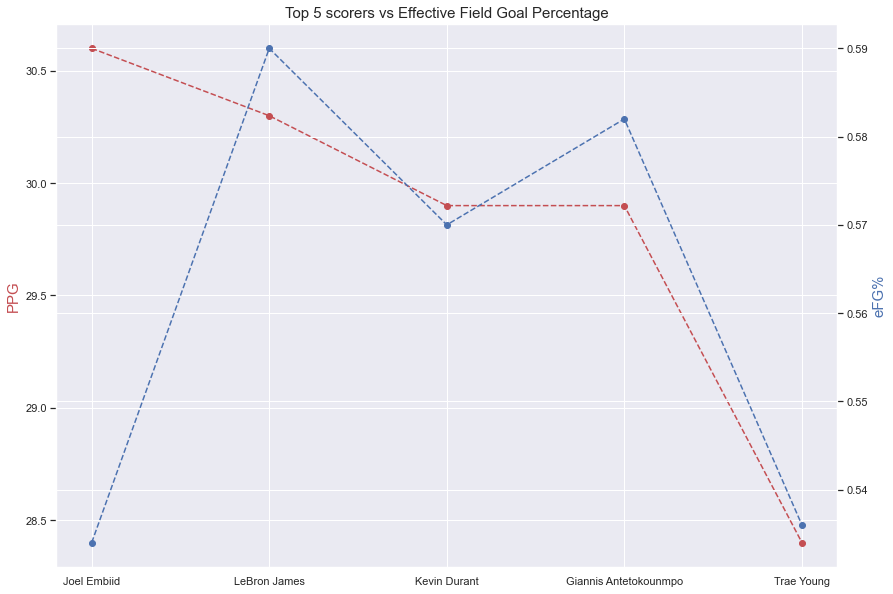

In [31]:
# increase the size
sns.set(rc={'figure.figsize':(14,10)})

fig_1, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(top_eff['Player'], top_eff['PTS'], color='r', marker='o', linestyle='--')
ax2.plot(top_eff['Player'], top_eff['eFG%'], 'b', marker='o', linestyle='--')

ax1.set_xlabel('')
ax1.set_ylabel('PPG', color='r', fontsize=15)
ax2.set_ylabel('eFG%', color='b', fontsize=15)

# ax1.set_xticklabels(top_eff['Player'], rotation='vertical')
ax1.set_title("Top 5 scorers vs Effective Field Goal Percentage", fontsize=15)
plt.show()

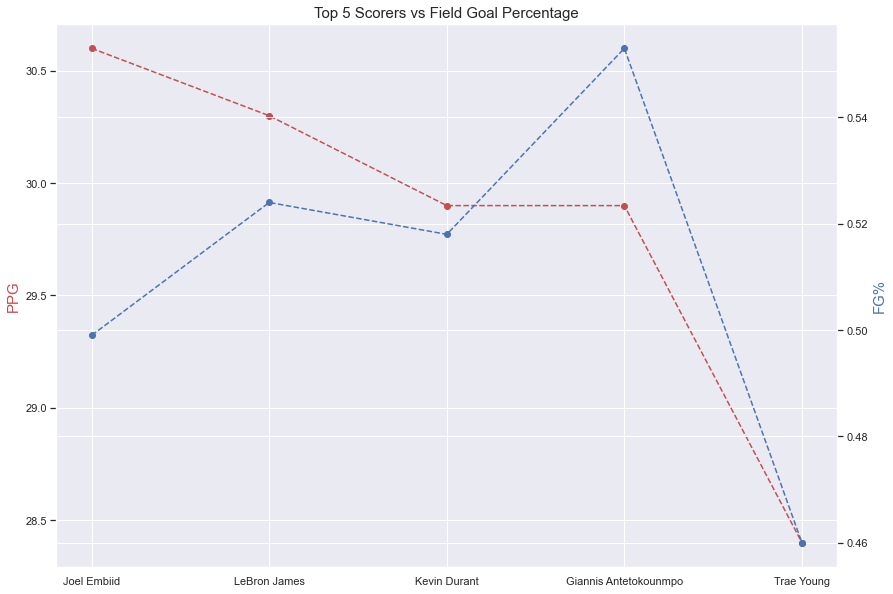

In [26]:
fig_2, ax1 = plt.subplots()
ax2 = ax1.twinx()

# increase the size
sns.set(rc={'figure.figsize':(14,10)})

ax1.plot(top_eff['Player'], top_eff['PTS'], color='r', marker='o', linestyle='--')
ax2.plot(top_eff['Player'], top_eff['FG%'], 'b', marker='o', linestyle='--')

ax1.set_xlabel('')
ax1.set_ylabel('PPG', color='r', fontsize=15)
ax2.set_ylabel('FG%', color='b', fontsize=15)

# ax1.set_xticklabels(top_eff['Player'], rotation='vertical')
ax1.set_title("Top 5 Scorers vs Field Goal Percentage", fontsize=15)
plt.show()

- Lebron is the most effective in terms of field goal efficiency, but Giannis is has the overall best raw field goal efficiency. This will be explained in 3.2.1.

##### 3.2.1 Why is this the case?

In [27]:
top_5_eff = top_scorers[['Player', 'FGA', 'FG%', '3PA', '3P%', '2PA', '2P%', 'FTA', 'FT%', 'eFG%']].reset_index(drop=True)
top_5_eff

,Player,FGA,FG%,3PA,3P%,2PA,2P%,FTA,FT%,eFG%
0,Joel Embiid,19.6,0.499,3.7,0.371,15.9,0.529,11.8,0.814,0.534
1,LeBron James,21.8,0.524,8.0,0.359,13.8,0.620,6.0,0.756,0.590
2,Kevin Durant,20.3,0.518,5.5,0.383,14.8,0.568,7.4,0.910,0.570
3,Giannis Antetokounmpo,18.6,0.553,3.6,0.293,15.0,0.616,11.4,0.722,0.582
4,Trae Young,20.3,0.460,8.0,0.382,12.3,0.512,7.3,0.904,0.536


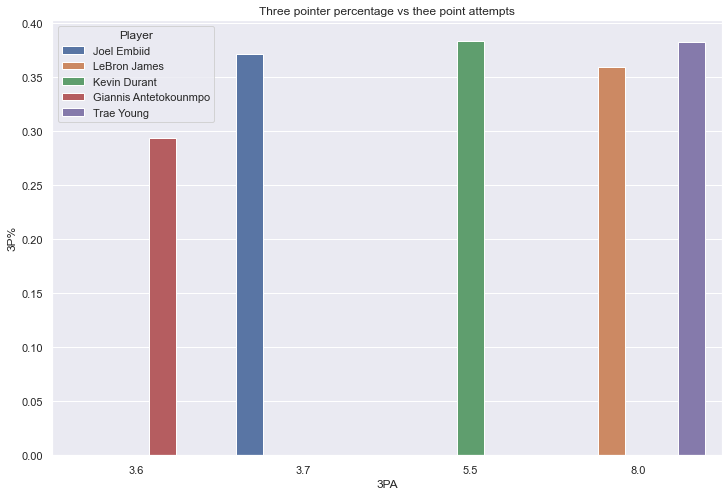

In [28]:
sns.set(rc = {'figure.figsize':(12,8)})
threes = sns.barplot(x='3PA', y='3P%', data=top_5_eff, hue='Player').set(title='Three pointer percentage vs thee point attempts')

- Giannis has a low three point attempt, maybe because he does not shoot the ball well from the three point line as suggested by his percentage
- Trey Young shoots a lot of threes and has the highest percentage therefore is his strongest skill
- Lebron does not shoot as well as the other players but he still has the one of the highest attempts, which could perhaps bring his eFG down

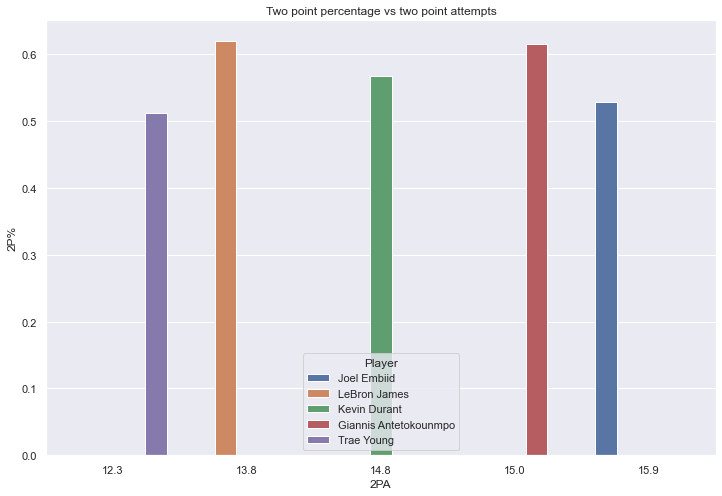

In [29]:
sns.set(rc = {'figure.figsize':(12,8)})
twos = sns.barplot(x='2PA', y='2P%', data=top_5_eff, hue='Player').set(title='Two point percentage vs two point attempts')

- Lebron and Giannis shoot the two point shot well but Giannis takes more attempts at this which perhaps increases his eFG
- Trey Young and Joel Embiid do not shoot the two point shot as well as the other players which is perhaps why their eFG are lower

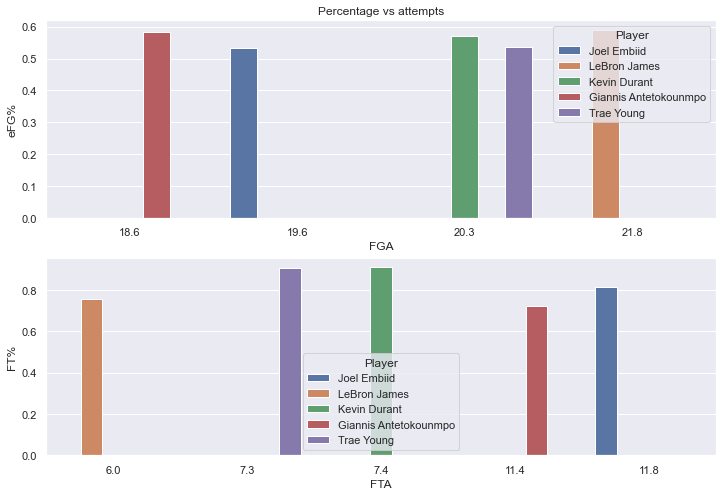

In [30]:
# side by side plot: This chart looks at the mean open price of each year
fig, ax = plt.subplots(2,1, figsize=(12,8))
fgs = sns.barplot(x='FGA', y='eFG%', data=top_5_eff, hue='Player', ax=ax[0]).set(title='Percentage vs attempts')
ffa = sns.barplot(x='FTA', y='FT%', data=top_5_eff, hue='Player', ax=ax[1])
plt.show()

- Joel Embiid has the lowest eFG but has the highest PPG. He takes the most free throws which is where he would score a lot of his points and the free throw does not count towards the field goal percentage
- Lebron James takes the least free throws and he also inefficient from the free throw line. However, he is stil the most efficient because this does not affect his field goal percentage
- Giannis and Lebron James are the most efficient because their best shot is their two point shot due to their efficiency and that is the shot that is shot the most by each player. Giannis' three point shot is very inefficient but he does not shoot it as much which does not affect his eFG much. Also, his free throw percentage is the worst out of the group and he has more attempts than all but Joel Embiid which is due to his aggressive play style. However, this does not affect his eFG.

Note: there are other factors which affect a player's efficiency which cannot be seen from this dataset. An example of this would be a player being double teamed.

Compare difference in FG% and eFG%

In [33]:
fg_vs_efg = top_5_eff[['Player', 'FG%', 'eFG%']]

In [49]:
array_fg = fg_vs_efg.values
array_fg

array([['Joel Embiid', 0.499, 0.534],
       ['LeBron James', 0.524, 0.59],
       ['Kevin Durant', 0.518, 0.57],
       ['Giannis Antetokounmpo', 0.553, 0.582],
       ['Trae Young', 0.46, 0.536]], dtype=object)

In [53]:
array_fg[0][0]

array(['Joel Embiid', 0.499, 0.534], dtype=object)

In [56]:
for index, player in enumerate (fg_vs_efg.values):
    print(array_fg[index][1], array_fg[index][2])

0.499 0.534
0.524 0.59
0.518 0.57
0.553 0.582
0.46 0.536


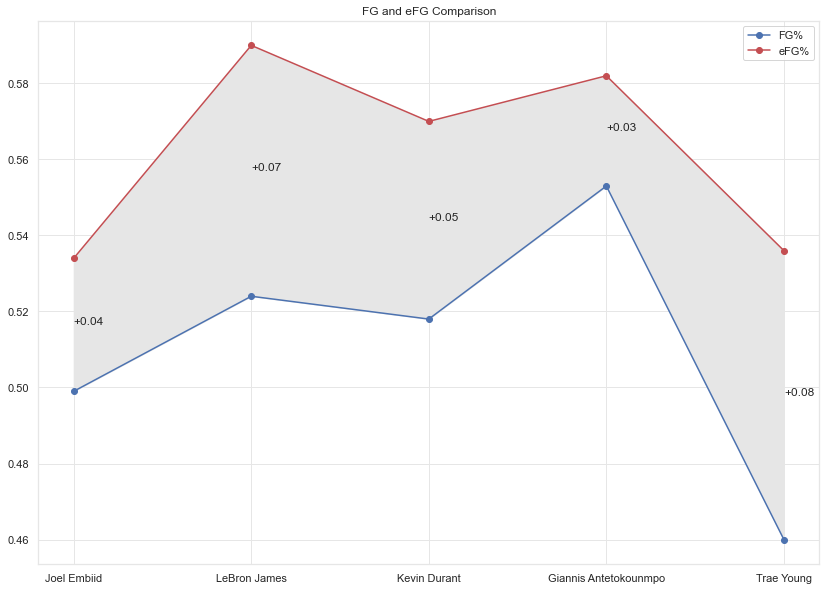

In [85]:
sns.set(rc = {'axes.facecolor':'white', 'grid.color': '#e6e6e6', 'axes.edgecolor': '#e6e6e6'})

fig = plt.figure()
ax = plt.axes()

x = fg_vs_efg['Player']
y1 = fg_vs_efg['FG%']
y2 = fg_vs_efg['eFG%']

plt.plot(x, y1, marker='o', color='b', label='FG%')
plt.plot(x, y2, marker='o', color='r', label='eFG%')

plt.fill_between(x, y1, y2, color='#e6e6e6')

for index, player in enumerate (fg_vs_efg.values):
    plt.annotate(f'+{round(array_fg[index][2]-array_fg[index][1], 2)}', (array_fg[index][0], (array_fg[index][2]+array_fg[index][1])/2))

plt.title("FG and eFG Comparison")
plt.legend()
plt.show()

It can be seen that the players that see the biggest increase from FG to eFG percentage are both Trae Young and Lebron James, respectively. This is because the three point shot is worth the most points and hence has the greatest effect on this value. Trae Young and Lebron James shoot this shot the most out of the rest of the group and hence see the biggest increase from FG to eFG.

Joel Embiid and Giannis shoot the most two pointers and the least three pointers which is not as effective.

The most efficient player by FG is Giannis but considering the eFG, which demonstrates the players effectiveness, it is Lebron James.

#### 3.2.2 Comparison of the top five scorers to the rest of the league

In [97]:
top_eff.values

array([['Joel Embiid', 30.6, 0.499, 0.534],
       ['LeBron James', 30.3, 0.524, 0.59],
       ['Kevin Durant', 29.9, 0.518, 0.57],
       ['Giannis Antetokounmpo', 29.9, 0.553, 0.582],
       ['Trae Young', 28.4, 0.46, 0.536]], dtype=object)

In [101]:
for index, player in enumerate(top_eff.values):
    print(player[1], player[3])

30.6 0.534
30.3 0.59
29.9 0.57
29.9 0.582
28.4 0.536


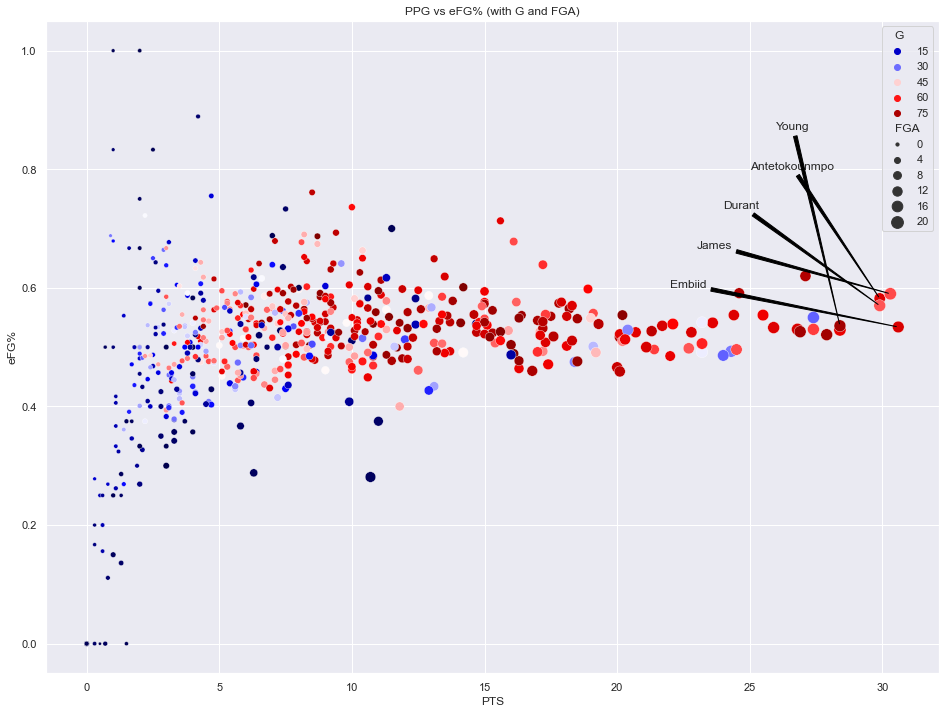

In [102]:
# increase the size
sns.set(rc={'figure.figsize':(16,12)})

fg_ppg = sns.scatterplot(x='PTS', y='eFG%', data=df, size='FGA', sizes = (10, 150), hue='G', palette='seismic').set(title='PPG vs eFG% (with G and FGA)')

# Annotate label points 
for index, player in enumerate (top_eff.values):
    plt.annotate(player[0].split(' ')[-1], (player[1], player[3]), (22+index,0.6+index/15),arrowprops={"arrowstyle":"wedge", "color":'black'})

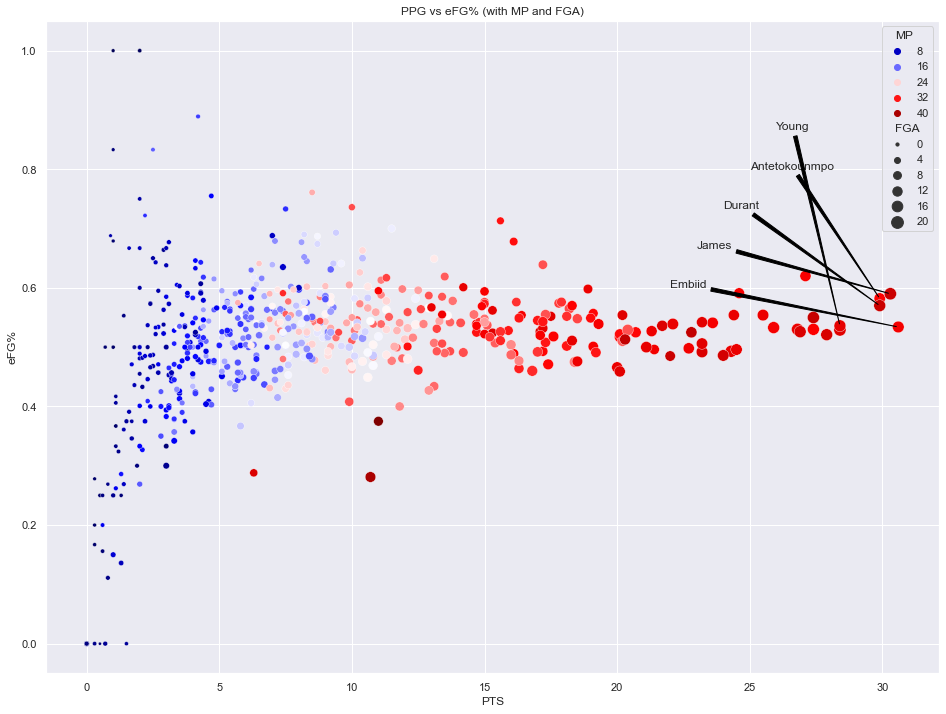

In [103]:
# increase the size
sns.set(rc={'figure.figsize':(16,12)})

fg_ppg = sns.scatterplot(x='PTS', y='eFG%', data=df, size='FGA', sizes = (10, 150), hue='MP', palette='seismic').set(title='PPG vs eFG% (with MP and FGA)')

# Annotate label points 
for index, player in enumerate (top_eff.values):
    plt.annotate(player[0].split(' ')[-1], (player[1], player[3]), (22+index,0.6+index/15),arrowprops={"arrowstyle":"wedge", "color":'black'})

Data shows a y=ln(x) type of relationship with points averaged and field goal percentage. The players that tend to score more points average more field goal attempts. Additionally, the top scorers tend to play more games. There are some exceptions to the data for example the highest scoring player who played less than 45 games is Kyrie Irving, who did not play due to not being vaccinated which is a mandate to play in New York. However, all the top scorers play high minutes in a game.

You can see how the top five players fit into the pool of players.

In [143]:
# Gives teams only in which the top 5 scorers play in
team_comparison = df[df['Tm'].isin(top_scorers['Tm'])]

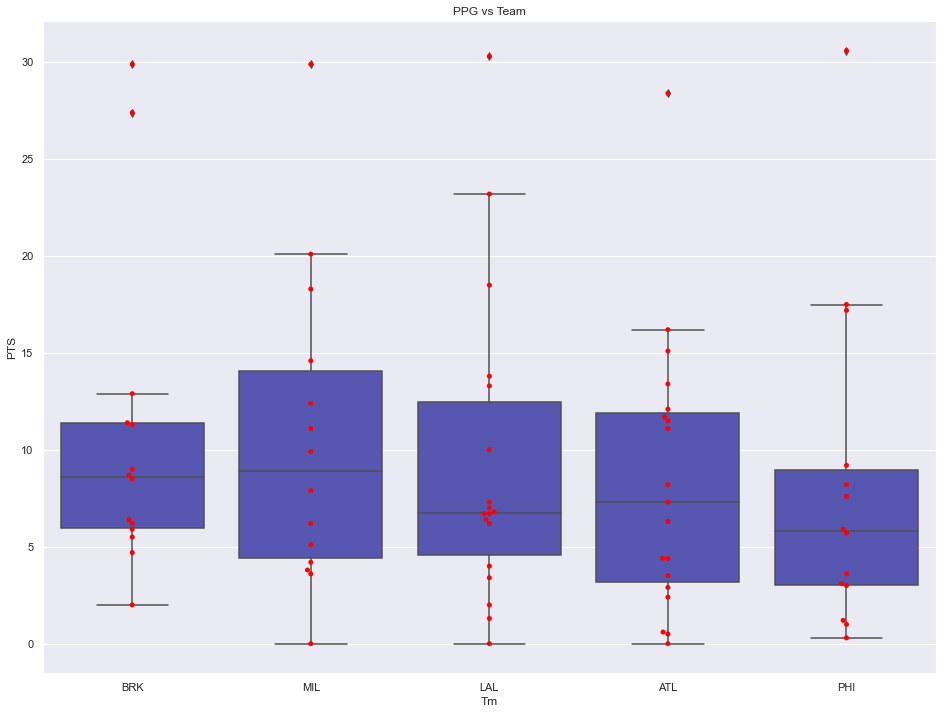

In [150]:
sns.boxplot(x="Tm", y="PTS", data=team_comparison, color="#4947bf").set(title='PPG vs Team')
sns.swarmplot(x="Tm", y="PTS", data=team_comparison, color="red")
plt.show()

- BRK had two high scoring players, with Kevin Durant being the top scorer on the team. Other than them, the were no other high scoring players.
- ML and LAL had a couple players who averaged more than 15 points excluding their top scorer.
- The mean points per game for LAL and PHI are low. Joel Embiid for PHI scored the most points on his team by far and done the most carrying in terms of scoring whereas Lebron had at least one player above 20ppg.

C:\Users\Abdulkadir\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


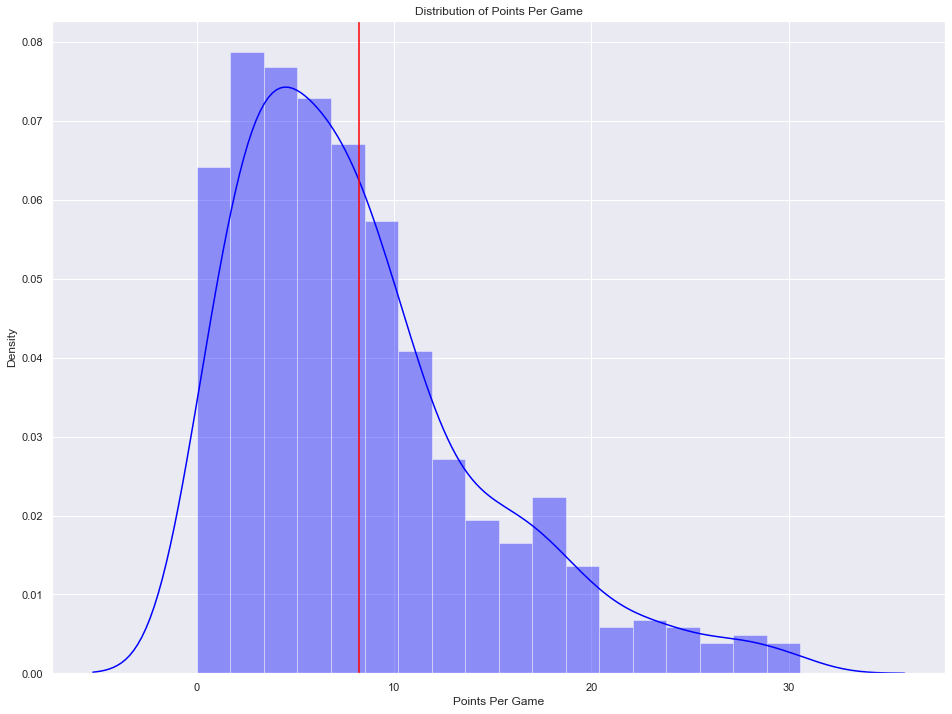

In [139]:
x = df['PTS'].values
fg_ppg = sns.distplot(x, color='blue').set(title='Distribution of Points Per Game')

# Calculating the mean
mean = df['PTS'].mean()

#ploting the mean
plt.axvline(mean, 0,1, color = 'red')

plt.xlabel('Points Per Game')
plt.show()

In [34]:
round(mean, 1)

8.2

Not a lot of players average over 20 points per game. There are 605 different players in the data, 30 teams in the NBA and 5 positions with 48 minutes in a game. Most high scoring players play at least 30 minutes per game. On average thats 20 players per team for 5 spots. So naturally most players will not get a lot of playing time. Only the stars will play more due to their skill sets and thus score more, which is why the distribution is positively skewed.

In [117]:
print(df.shape)
print(df['PTS'].std())

(605, 30)
6.332871242073585


In [113]:
df['PTS'][df['Player'] == 'LeBron James']

368    30.3
Name: PTS, dtype: float64

In [126]:
df['PTS'].mode()

0    0.0
dtype: float64

The mode for points per game is 0 with the standard deviation of 6.33 from the mean of 8.2.

#### 3.3 Who deserves to win the scoring title strictly based on numbers?

The title is based on scoring average and a requirement is that the player has to play at least 58 games

In [35]:
top_scorers

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,162,Joel Embiid,C,27,PHI,68,68,33.8,9.8,19.6,0.499,1.4,3.7,0.371,8.4,15.9,0.529,0.534,9.6,11.8,0.814,2.1,9.6,11.7,4.2,1.1,1.5,3.1,2.7,30.6
1,274,LeBron James,SF,37,LAL,56,56,37.2,11.4,21.8,0.524,2.9,8.0,0.359,8.6,13.8,0.620,0.590,4.5,6.0,0.756,1.1,7.1,8.2,6.2,1.3,1.1,3.5,2.2,30.3
2,154,Kevin Durant,PF,33,BRK,55,55,37.2,10.5,20.3,0.518,2.1,5.5,0.383,8.4,14.8,0.568,0.570,6.8,7.4,0.910,0.5,6.9,7.4,6.4,0.9,0.9,3.5,2.1,29.9
3,12,Giannis Antetokounmpo,PF,27,MIL,67,67,32.9,10.3,18.6,0.553,1.1,3.6,0.293,9.2,15.0,0.616,0.582,8.3,11.4,0.722,2.0,9.6,11.6,5.8,1.1,1.4,3.3,3.2,29.9
4,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,0.460,3.1,8.0,0.382,6.3,12.3,0.512,0.536,6.6,7.3,0.904,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4


In [135]:
top_scorers_adjusted = top_scorers[:]

Lebron James does not meet the requied games, therefore his average must be adjusted for 58 games.
Same with Kevin Durant.

- 56 games: 30.3
- 58 games: 56/58 * 30.3

In [136]:
# Lebron James
top_scorers_adjusted.at[1,'G'] = 58
top_scorers_adjusted.at[1,'PTS'] = round(56/58 * 30.3, 1)

# Kevin Durant
top_scorers_adjusted.at[2,'G'] = 58
top_scorers_adjusted.at[2,'PTS'] = round(55/58 * 29.9, 1)

adjusted_pts = top_scorers_adjusted[['Player', 'G', 'MP', 'PTS']].sort_values('PTS', ascending=False)
adjusted_pts

,Player,G,MP,PTS
0,Joel Embiid,68,33.8,30.6
3,Giannis Antetokounmpo,67,32.9,29.9
1,LeBron James,58,37.2,29.3
2,Kevin Durant,58,37.2,28.4
4,Trae Young,76,34.9,28.4


[Text(0.5, 1.0, 'Adjusted PPG')]

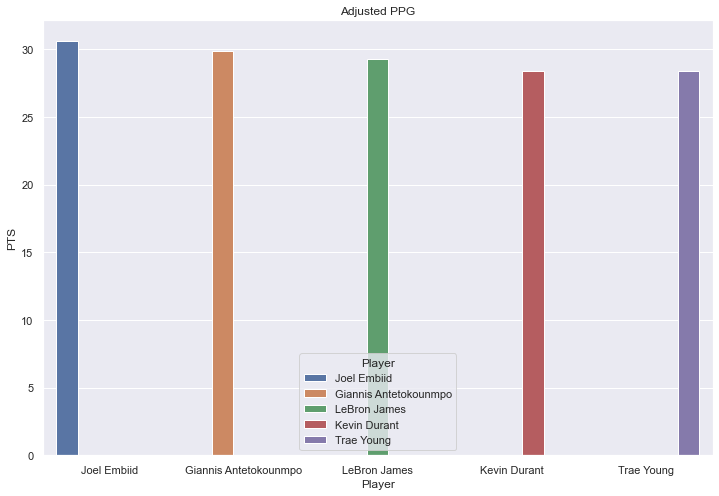

In [137]:
sns.set(rc = {'figure.figsize':(12,8)})
sns.barplot(x='Player', y='PTS', data=adjusted_pts, hue='Player').set(title='Adjusted PPG')

- It is clear who has the highest PPG average for at least 58 games; Joel Embiid. He also managed to do this in less minutes played and over more games in the season than the runner up, Giannis Antetokounmpo.
- The actual winner of the 2021-2022 scoring title is Joel Embiid with the runner up being Giannis Antetokounmpo.

#### 3.4 Who deserves to win the MVP based on numbers?

- Look at the players which have the best winning records and individual stats. Need data that team stats as well as more advanced individual stats.'

- Before that though, the best way to try and get an understanding of what stats they base the MVP on, I will look at the 2020-2021 player stats and see why Nikola Jokic won the MVP that year.

#### 3.4.1 2020-2021 Rankings

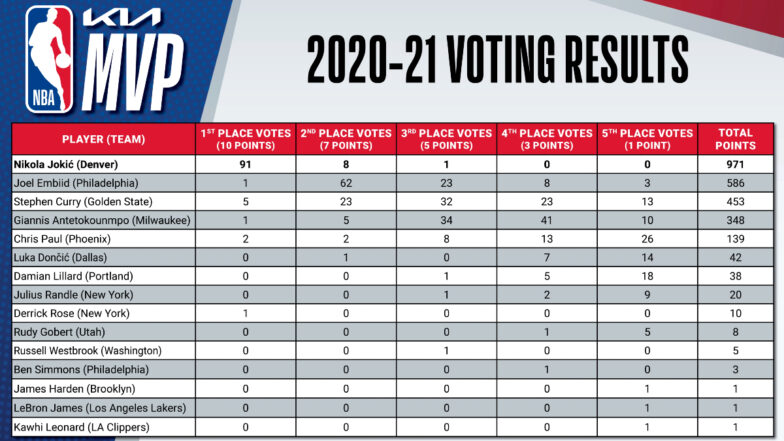

In [128]:
import os
from IPython.display import Image
PATH = r".\kia-mvp-voting-results-784x441.jpg"
Image(filename = PATH, width=900, height=900)

I have decided to base the MVP award based on wins, points scored, assist, +/- and PER (PLayer Efficiency Rating). 

The Player Efficiency Rating was a creation of ESPN basketball columnist John Hollinger. The PER sums up all a player's positive accomplishments, subtracts the negative accomplishments, and returns a per-minute rating of a player's performance.

#### 3.4.2 2020-2021 Data exploration

In [172]:
last_season = pd.read_csv(r".\NBA 2020-2021 Regular Season Stats.csv")
last_season

,Unnamed: 0,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
0,1,Stephen Curry,GSW,33,63,37,26,34.2,32.0,10.4,21.7,48.2,5.3,12.7,42.1,5.7,6.3,91.6,0.5,5.0,5.5,5.8,3.4,1.2,0.1,1.9,47.9,8,0,3.9
1,2,Bradley Beal,WAS,28,60,32,28,35.8,31.3,11.2,23.0,48.5,2.2,6.2,34.9,6.8,7.7,88.9,1.2,3.5,4.7,4.4,3.1,1.2,0.4,2.3,45.0,4,0,-0.1
2,3,Damian Lillard,POR,30,67,39,28,35.8,28.8,9.0,19.9,45.1,4.1,10.5,39.1,6.7,7.2,92.8,0.5,3.7,4.2,7.5,3.0,0.9,0.3,1.5,45.7,16,0,3.0
3,4,Joel Embiid,PHI,27,51,39,12,31.1,28.5,9.0,17.6,51.3,1.1,3.0,37.7,9.2,10.7,85.9,2.2,8.4,10.6,2.8,3.1,1.0,1.4,2.4,49.3,31,0,7.9
4,5,Giannis Antetokounmpo,MIL,26,61,40,21,33.0,28.1,10.3,18.0,56.9,1.1,3.6,30.3,6.5,9.5,68.5,1.6,9.4,11.0,5.9,3.4,1.2,1.2,2.8,53.9,41,7,6.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,536,Anzejs Pasecniks,WAS,25,1,1,0,6.3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,5.0,0.0,0.0,2.0,-2.3,0,0,-13.0
536,536,Ashton Hagans,MIN,21,2,0,2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,-0.5,0,0,-1.5
537,536,Greg Whittington,DEN,28,4,3,1,3.0,0.0,0.0,0.8,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2.3
538,536,Noah Vonleh,BKN,25,4,3,1,2.7,0.0,0.0,0.8,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.3,0.3,0.3,0.5,0.0,0.0,0.5,0.2,0,0,-4.0


Load in data with PER for last season and merge with last season data above.

In [184]:
# top 50 players by PER rating dataset
PER = pd.read_csv(r".\PER NBA 2020-2021.csv")
PER.head()

,RK,PLAYER,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER,VA,EWA
0,1,"Nikola Jokic, DEN",74,33.5,0.661,24.5,11.8,0,0.0,0,0.0,32.94,825.7,27.5
1,2,"Giannis Antetokounmpo, MIL",67,32.9,0.633,17.7,10.0,0,0.0,0,0.0,32.12,0.0,0.0
2,3,"Joel Embiid, PHI",68,33.8,0.616,13.0,9.8,0,0.0,0,0.0,31.24,707.4,23.6
3,4,"LeBron James, LAL",56,37.2,0.619,18.2,10.2,0,0.0,0,0.0,26.25,0.0,0.0
4,5,"Kevin Durant, BKN",55,37.2,0.634,19.1,10.4,0,0.0,0,0.0,25.69,0.0,0.0


In [185]:
# split the player column into player and team
PER['TEAM'] = PER['PLAYER'].str.split(',').str[-1]
PER['PLAYER'] = PER['PLAYER'].str.split(',').str[0]
PER.head()

,RK,PLAYER,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER,VA,EWA,TEAM
0,1,Nikola Jokic,74,33.5,0.661,24.5,11.8,0,0.0,0,0.0,32.94,825.7,27.5,DEN
1,2,Giannis Antetokounmpo,67,32.9,0.633,17.7,10.0,0,0.0,0,0.0,32.12,0.0,0.0,MIL
2,3,Joel Embiid,68,33.8,0.616,13.0,9.8,0,0.0,0,0.0,31.24,707.4,23.6,PHI
3,4,LeBron James,56,37.2,0.619,18.2,10.2,0,0.0,0,0.0,26.25,0.0,0.0,LAL
4,5,Kevin Durant,55,37.2,0.634,19.1,10.4,0,0.0,0,0.0,25.69,0.0,0.0,BKN


In [186]:
print(last_season.shape)
print(PER.shape)

(540, 30)
(50, 15)


In [193]:
combined_data = last_season.merge(PER[['TEAM', 'PER']], on='TEAM', how='left')

In [195]:
combined_data.shape

(540, 31)

In [196]:
combined_data.dtypes

Unnamed: 0      int64
PLAYER         object
TEAM           object
AGE             int64
GP              int64
W               int64
L               int64
MIN           float64
PTS           float64
FGM           float64
FGA           float64
FG%           float64
3PM           float64
3PA           float64
3P%           float64
FTM           float64
FTA           float64
FT%           float64
OREB          float64
DREB          float64
REB           float64
AST           float64
TOV           float64
STL           float64
BLK           float64
PF            float64
FP            float64
DD2             int64
TD3             int64
+/-           float64
PER           float64
dtype: object

#### 3.5

## 4.